In [14]:
# Exemplo uso K-means (Aprendizado não supervisionado, modelo descritivo, tarefa: agrupamento)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Carregando a base (atributos de entrada somente)
X, _ = load_wine(return_X_y=True)

# Agrupamento considerando diferentes valores de k
n_clusters=[2,3,4,6,8]
sl_score=[]
inertia=[]
for k in n_clusters:
  # Agruoamento via Kmeans
  clusterer = KMeans(n_clusters=k, n_init='auto', random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  # salvando os labels de cada ponto
  lab = np.asarray(cluster_labels)
  np.savetxt('classes'+str(k), lab, fmt='%i', delimiter="\n")
  # Cálculo do índice silhueta médio
  silhouette_avg = silhouette_score(X, cluster_labels)
  sl_score.append(silhouette_avg)
  inertia.append(clusterer.inertia_)
  print("n_clusters =", k," índice silhueta médio :", silhouette_avg, 'Inertia:', clusterer.inertia_)
  # calcula shuleta para cada exemplo
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

    





n_clusters = 2  índice silhueta médio : 0.655521358978658 Inertia: 4545746.292099379
n_clusters = 3  índice silhueta médio : 0.5595823478987213 Inertia: 2633555.3324093386
n_clusters = 4  índice silhueta médio : 0.5620915308951057 Inertia: 1337437.1128958864
n_clusters = 6  índice silhueta médio : 0.5261536522652805 Inertia: 703640.5890452265
n_clusters = 8  índice silhueta médio : 0.548621360407612 Inertia: 326044.57084739424


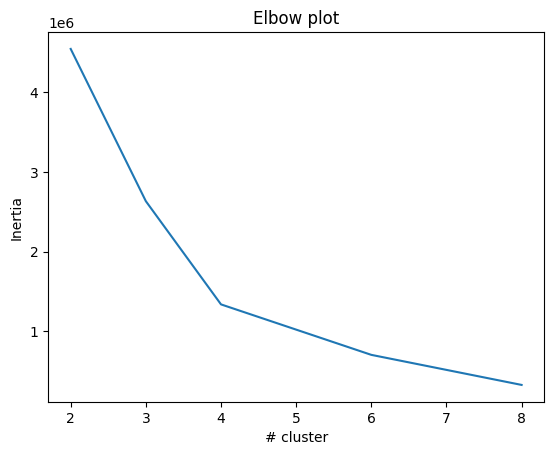

In [15]:
# Plotando Elbow curve
import matplotlib.pyplot as plt

plt.plot(n_clusters,inertia)
plt.title('Elbow plot')
plt.xlabel('# cluster')
plt.ylabel('Inertia')
plt.show()

In [16]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import  model_selection

y=np.loadtxt("classes3")

clfb = GaussianNB()
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)
print("\nCross Validation Results %d folds:" % folds)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())






Cross Validation Results 10 folds:
Mean Accuracy: 0.83595
Mean Std: 0.09745
